# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Empty list to hold records
city_name = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

record_index = 0
set_index = 1

print("Beginning Data Retrieval")
print("-"*30)

for city in cities:
     try:
        response = requests.get(query_url + city).json()
        time.sleep(0.3)
        city_name.append(response["name"])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        if record_index == 50:
            record_index = 0
            set_index += 1
        else:
            record_index += 1
        
        print(f"Processing Record {record_index} of Set {set_index} | {city} ")
    
     except(KeyError):
            print("City not found, Skipping...")
    
    

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | east london 
Processing Record 2 of Set 1 | hambantota 
City not found, Skipping...
Processing Record 3 of Set 1 | ushuaia 
Processing Record 4 of Set 1 | vaini 
Processing Record 5 of Set 1 | pagudpud 
Processing Record 6 of Set 1 | chuy 
Processing Record 7 of Set 1 | tulun 
Processing Record 8 of Set 1 | oksfjord 
Processing Record 9 of Set 1 | dhule 
Processing Record 10 of Set 1 | rikitea 
City not found, Skipping...
Processing Record 11 of Set 1 | mataura 
Processing Record 12 of Set 1 | sakaiminato 
Processing Record 13 of Set 1 | sandpoint 
Processing Record 14 of Set 1 | albany 
Processing Record 15 of Set 1 | hobart 
Processing Record 16 of Set 1 | raudeberg 
City not found, Skipping...
Processing Record 17 of Set 1 | puerto escondido 
Processing Record 18 of Set 1 | naron 
Processing Record 19 of Set 1 | lata 
Processing Record 20 of Set 1 | opuwo 
Processing Record 21 of Set 1 | pangnirtu

Processing Record 34 of Set 4 | beringovskiy 
Processing Record 35 of Set 4 | pacific grove 
Processing Record 36 of Set 4 | port elizabeth 
Processing Record 37 of Set 4 | lethem 
Processing Record 38 of Set 4 | victoria 
Processing Record 39 of Set 4 | jagdalpur 
City not found, Skipping...
Processing Record 40 of Set 4 | manbij 
Processing Record 41 of Set 4 | sao jose da coroa grande 
Processing Record 42 of Set 4 | busayra 
Processing Record 43 of Set 4 | grand island 
Processing Record 44 of Set 4 | mazagao 
Processing Record 45 of Set 4 | bahia blanca 
Processing Record 46 of Set 4 | dingli 
Processing Record 47 of Set 4 | ahipara 
Processing Record 48 of Set 4 | muisne 
Processing Record 49 of Set 4 | chumikan 
Processing Record 50 of Set 4 | hervey bay 
Processing Record 0 of Set 5 | lagos 
Processing Record 1 of Set 5 | rudnogorsk 
Processing Record 2 of Set 5 | constitucion 
Processing Record 3 of Set 5 | somotillo 
Processing Record 4 of Set 5 | changji 
Processing Record 5

Processing Record 13 of Set 8 | tommot 
Processing Record 14 of Set 8 | meybod 
Processing Record 15 of Set 8 | kismayo 
Processing Record 16 of Set 8 | bethanien 
Processing Record 17 of Set 8 | cairns 
Processing Record 18 of Set 8 | teguldet 
Processing Record 19 of Set 8 | luwuk 
Processing Record 20 of Set 8 | swift current 
City not found, Skipping...
Processing Record 21 of Set 8 | saint anthony 
Processing Record 22 of Set 8 | roald 
Processing Record 23 of Set 8 | dongsheng 
City not found, Skipping...
Processing Record 24 of Set 8 | san benito 
Processing Record 25 of Set 8 | iqaluit 
Processing Record 26 of Set 8 | liberta 
Processing Record 27 of Set 8 | sri aman 
Processing Record 28 of Set 8 | thornhill 
Processing Record 29 of Set 8 | duluth 
Processing Record 30 of Set 8 | gabu 
Processing Record 31 of Set 8 | damavand 
Processing Record 32 of Set 8 | esperance 
Processing Record 33 of Set 8 | kamen-rybolov 
Processing Record 34 of Set 8 | nalut 
Processing Record 35 of

Processing Record 40 of Set 11 | neyvo-shaytanskiy 
Processing Record 41 of Set 11 | floro 
City not found, Skipping...
Processing Record 42 of Set 11 | morondava 
City not found, Skipping...
Processing Record 43 of Set 11 | sisimiut 
Processing Record 44 of Set 11 | evensk 
Processing Record 45 of Set 11 | tucumcari 
Processing Record 46 of Set 11 | vila velha 
Processing Record 47 of Set 11 | dmitriyevka 
Processing Record 48 of Set 11 | yongan 
Processing Record 49 of Set 11 | pisco 
Processing Record 50 of Set 11 | nadym 
Processing Record 0 of Set 12 | isangel 
Processing Record 1 of Set 12 | atar 
Processing Record 2 of Set 12 | road town 
Processing Record 3 of Set 12 | biltine 


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:

# Create dataframe
city_data = pd.DataFrame({
    "City": city_name, 
    "Lat": lat, 
    "Lng": long, 
    "Max temp": max_temp, 
    "Humidity": humidity, 
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed, 
    "Country": country, 
    "Date": date,
})

# Export to csv
city_data.to_csv("city_data.csv", index=False, header=True)
# Display dataframe
city_data.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.0153,27.9116,18.17,73,68,6.01,ZA,1636849728
1,Hambantota,6.1241,81.1185,25.63,83,96,5.74,LK,1636849729
2,Ushuaia,-54.8000,-68.3000,11.81,43,40,4.63,AR,1636849715
3,Vaini,-21.2000,-175.2000,24.19,69,47,3.74,TO,1636849731
4,Pagudpud,18.5616,120.7868,27.98,87,84,6.06,PH,1636849732


In [8]:
# Describe data to check if we have a Max humidity of 100%
# Display
city_data.describe()

,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,21.640785,19.708529,12.886348,72.943262,56.416667,3.235213,1.636850e+09
std,32.626522,90.032613,13.654415,21.286099,40.603421,2.544023,1.550163e+02
min,-54.800000,-175.200000,-28.180000,11.000000,0.000000,0.000000,1.636850e+09
25%,-4.366825,-59.586725,3.410000,63.000000,11.000000,1.430000,1.636850e+09
50%,25.127300,23.164450,15.945000,78.500000,69.000000,2.570000,1.636850e+09
75%,48.740225,102.263925,24.075000,89.000000,99.000000,4.240000,1.636850e+09
max,78.218600,179.316700,33.930000,100.000000,100.000000,16.580000,1.636850e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
max_humidity = city_data.index[city_data["Humidity"] == 100]
max_humidity

Int64Index([87, 92, 112, 151, 339, 441, 543], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(max_humidity, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.0153,27.9116,18.17,73,68,6.01,ZA,1636849728
1,Hambantota,6.1241,81.1185,25.63,83,96,5.74,LK,1636849729
2,Ushuaia,-54.8000,-68.3000,11.81,43,40,4.63,AR,1636849715
3,Vaini,-21.2000,-175.2000,24.19,69,47,3.74,TO,1636849731
4,Pagudpud,18.5616,120.7868,27.98,87,84,6.06,PH,1636849732


In [11]:

clean_city_data.describe()

,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,21.425941,19.893703,12.968725,72.603232,56.141831,3.243662,1.636850e+09
std,32.658384,90.075526,13.608343,21.200707,40.680802,2.543923,1.548884e+02
min,-54.800000,-175.200000,-28.180000,11.000000,0.000000,0.000000,1.636850e+09
25%,-5.089200,-59.516700,3.450000,62.000000,11.000000,1.440000,1.636850e+09
50%,24.922700,24.183300,16.070000,78.000000,68.000000,2.570000,1.636850e+09
75%,48.405400,102.263400,24.180000,89.000000,99.000000,4.240000,1.636850e+09
max,78.218600,179.316700,33.930000,99.000000,100.000000,16.580000,1.636850e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

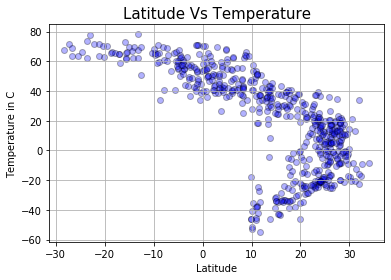

In [12]:
# Set variables
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Max temp"]
plt.scatter(y_axis, x_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.30)

plt.title("Latitude Vs Temperature",fontsize =15)
plt.xlabel("Latitude")
plt.ylabel("Temperature in C")
plt.grid()
plt.savefig('plots/Latitude vs. Temperature Plot.png')



## Latitude vs. Humidity Plot

/Users/eleonorajmartin/opt/anaconda3/envs/pythonData/lib/python3.6/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


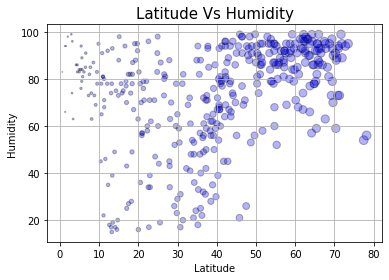

In [13]:
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Humidity"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", s=x_axis, alpha=0.30)

plt.title("Latitude Vs Humidity",fontsize =15)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig('plots/Latitude vs. Humidity Plot.png')

## Latitude vs. Cloudiness Plot

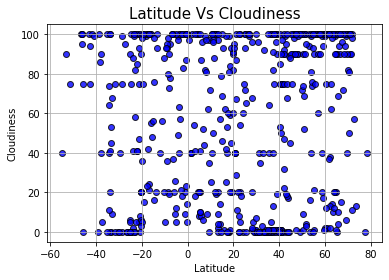

In [14]:
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.80)

plt.title("Latitude Vs Cloudiness",fontsize =15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig('plots/Latitude vs. Cloudiness Plot.png')

## Latitude vs. Wind Speed Plot

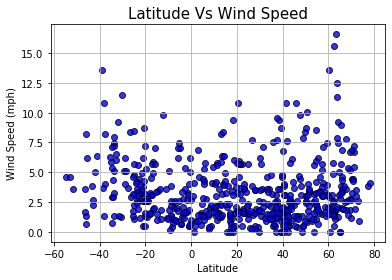

In [15]:
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.80)

plt.title("Latitude Vs Wind Speed",fontsize =15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('plots/Latitude vs. Wind Speed Plot.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

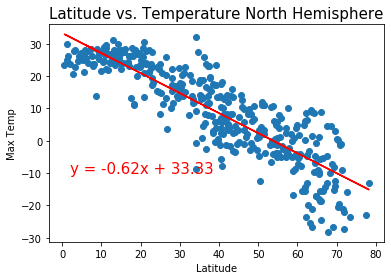

The r-value is -0.8726571259935852


<Figure size 432x288 with 0 Axes>

In [16]:
# Calculate the correlation coefficient and linear regression model 
# Put northern lats and temp on variables
north_df = clean_city_data.loc[clean_city_data["Lat"] > 0]

# Set x and y values using the previous steps variables
x_axis = north_df["Lat"]
y_axis = north_df["Max temp"]
# Set the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# Set regression value
regress_values = x_axis* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot and line plot to hold the regression line
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
# Set title and labels
plt.annotate(line_eq,(2,-10),fontsize=15,color="red")
plt.title("Latitude vs. Temperature North Hemisphere", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
# print the correlation coeficient using the pearson correlation coeficient
print(f"The r-value is {rvalue}")
plt.savefig('plots/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

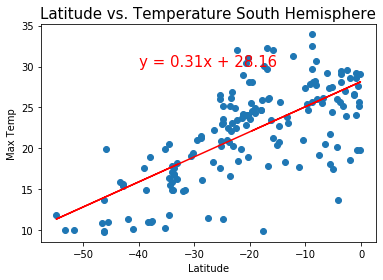

The r-value is 0.6906699046967577


<Figure size 432x288 with 0 Axes>

In [17]:
south_df = clean_city_data.loc[clean_city_data["Lat"] < 0]

# Set x and y values using the previous steps variables
x_axis = south_df["Lat"]
y_axis = south_df["Max temp"]
# Set the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# Set regression value
regress_values = x_axis* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot and line plot to hold the regression line
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
# Set title and labels
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
plt.title("Latitude vs. Temperature South Hemisphere", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
# print the correlation coeficient using the pearson correlation coeficient
print(f"The r-value is {rvalue}")
plt.savefig('plots/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

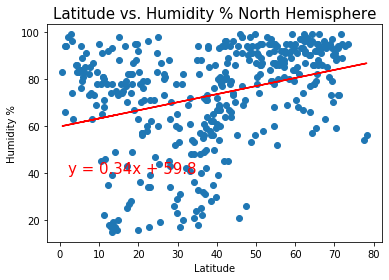

The r-value is 0.31672042798741606


<Figure size 432x288 with 0 Axes>

In [18]:
north_df = clean_city_data.loc[clean_city_data["Lat"] > 0]

# Set x and y values using the previous steps variables
x_axis = north_df["Lat"]
y_axis = north_df["Humidity"]
# Set the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# Set regression value
regress_values = x_axis* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot and line plot to hold the regression line
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
# Set title and labels
plt.annotate(line_eq,(2,40),fontsize=15,color="red")
plt.title("Latitude vs. Humidity % North Hemisphere", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.show()
# print the correlation coeficient using the pearson correlation coeficient
print(f"The r-value is {rvalue}")
plt.savefig('plots/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

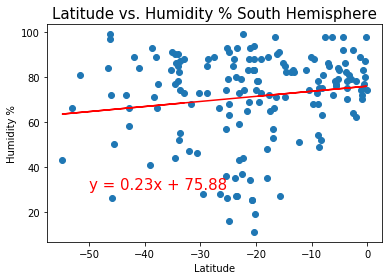

The r-value is 0.1501042139749486


<Figure size 432x288 with 0 Axes>

In [19]:
south_df = clean_city_data.loc[clean_city_data["Lat"] < 0]

# Set x and y values using the previous steps variables
x_axis = south_df["Lat"]
y_axis = south_df["Humidity"]
# Set the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# Set regression value
regress_values = x_axis* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot and line plot to hold the regression line
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
# Set title and labels
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.title("Latitude vs. Humidity % South Hemisphere", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.show()
# print the correlation coeficient using the pearson correlation coeficient
print(f"The r-value is {rvalue}")
plt.savefig('plots/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

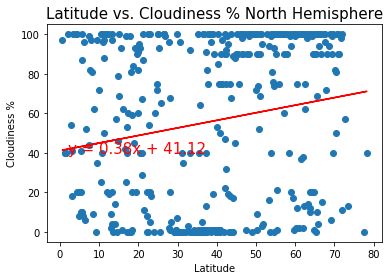

The r-value is 0.1856197082587206


<Figure size 432x288 with 0 Axes>

In [20]:
north_df = clean_city_data.loc[clean_city_data["Lat"] > 0]

# Set x and y values using the previous steps variables
x_axis = north_df["Lat"]
y_axis = north_df["Cloudiness"]
# Set the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# Set regression value
regress_values = x_axis* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot and line plot to hold the regression line
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
# Set title and labels
plt.annotate(line_eq,(2,40),fontsize=15,color="red")
plt.title("Latitude vs. Cloudiness % North Hemisphere", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.show()
# print the correlation coeficient using the pearson correlation coeficient
print(f"The r-value is {rvalue}")
plt.savefig('plots/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

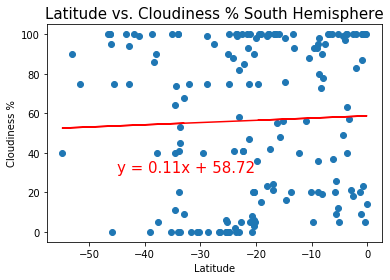

The r-value is 0.03794026753436847


<Figure size 432x288 with 0 Axes>

In [21]:
south_df = clean_city_data.loc[clean_city_data["Lat"] < 0]

# Set x and y values using the previous steps variables
x_axis = south_df["Lat"]
y_axis = south_df["Cloudiness"]
# Set the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# Set regression value
regress_values = x_axis* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create scatter plot and line plot to hold the regression line
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
# Set title and labels
plt.annotate(line_eq,(-45,30),fontsize=15,color="red")
plt.title("Latitude vs. Cloudiness % South Hemisphere", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.show()
# print the correlation coeficient using the pearson correlation coeficient
print(f"The r-value is {rvalue}")
plt.savefig('plots/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

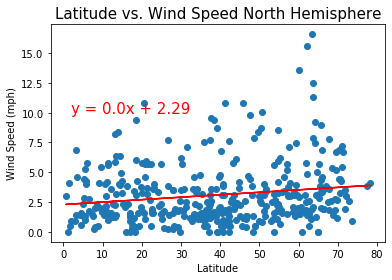

The r-value is 0.16043042393216395


<Figure size 432x288 with 0 Axes>

In [22]:
north_df = clean_city_data.loc[clean_city_data["Lat"] > 0]

# Set x and y values using the previous steps variables
x_axis = north_df["Lat"]
y_axis = north_df["Wind Speed"]
# Set the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# Set regression value
regress_values = x_axis* slope + intercept
line_eq = "y = " + str(round(slope,0)) + "x + " + str(round(intercept,2))
# Create scatter plot and line plot to hold the regression line
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
# Set title and labels
plt.annotate(line_eq,(2,10),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed North Hemisphere", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
# print the correlation coeficient using the pearson correlation coeficient
print(f"The r-value is {rvalue}")
plt.savefig('plots/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

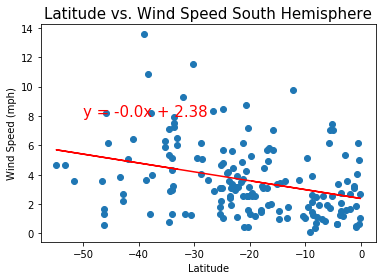

The r-value is -0.32662485807401415


<Figure size 432x288 with 0 Axes>

In [23]:
south_df = clean_city_data.loc[clean_city_data["Lat"] < 0]

# Set x and y values using the previous steps variables
x_axis = south_df["Lat"]
y_axis = south_df["Wind Speed"]
# Set the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# Set regression value
regress_values = x_axis* slope + intercept
line_eq = "y = " + str(round(slope,0)) + "x + " + str(round(intercept,2))
# Create scatter plot and line plot to hold the regression line
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
# Set title and labels
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed South Hemisphere", fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
# print the correlation coeficient using the pearson correlation coeficient
print(f"The r-value is {rvalue}")
plt.savefig('plots/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')

#### After realizing analyzing the visualizations and the r-values we can see that there is no apparent correlation between latitude and humidity, wind speed and cloudiness but there is a significant relationship between latitude and max temperature.